In [1]:
def intersect_trop_lines(first,second):
    a = first[0]
    b = first[1]
    c = second[0]
    d = second[1]
    #anchored at (c,d)
    if a>c and b>d and a>b: #1
        return [c+b,d+b]
    if a>c and b>d and a<b: #2
        return [c+a,d+a]
    if a>c and b>d and a==b:
        return [c+b-d,b]
    if a<c and b>d: #3
        return [a,d]
    if a<c and b<d and a<b: #4
        return [a+d-b,d]
    if a<c and b<d and a>b: #5
        return [c,b+c-a]
    if a<c and b<d and a==b:
        return [c,b+c-a]
    if a>c and d>b: #6
        return [c,b]
    #anchored at (a,b)
    if c>a and d>b and c>d: #1
        return [a+d,b+d]
    if c>a and d>b and c<d: #2
        return [a+c,b+c]
    if c>a and d>b and c==d:
        return [a+d-b,d]
    if c<a and d>b: #3
        return [c,b]
    if c<a and d<b and c<d: #4
        return [c+b-d,b]
    if c<a and d<b and c>d: #5
        return [a,d+a-c]
    if c<a and d<b and c==d:
        return [a,d+a-c]
    if c>a and b>d: #6
        return [a,d]
    
    
def compute_pseudovertices(vertices):
    pseudovertices = copy(vertices)
    edges = []
    for pair in Subsets(range(len(vertices)),2):
        if intersect_trop_lines(vertices[pair[0]],vertices[pair[1]]):
            pseudovertices.append(intersect_trop_lines(vertices[pair[0]],vertices[pair[1]]))
            index = len(pseudovertices)-1
            edges.append([pair[0],index])
            edges.append([pair[1],index])
        else:
            edges.append(list(pair))
    return {'pseudo': pseudovertices, 'edges': edges, 'vertices': vertices}


def tangent_cone(polytron, vertex_index):
    
    def primitive_vector_in_edge_direction(direction):
        x = direction[0]
        y = direction[1]
        if x==0 and y>0:
            primitive = [ 0, 1]
        elif x==0 and y<0:
            primitive = [ 0,-1]
        elif x>0 and y>0:
            primitive = [ 1, 1]
        elif x>0 and y==0:
            primitive = [ 1, 0]
        elif x<0 and y==0:
            primitive = [-1, 0]
        elif x<0 and y<0:
            primitive = [-1,-1]
        else:
            print 'cannot find primitive vector in direction ('+str(x)+' , '+str(y)+')'
        return primitive
    
    ##compute the generating function of the tangent cone at the given vertex
    vertex = polytron['pseudo'][vertex_index]
    
    
    #find neighbours of vertex
    incident_edges_index = [edge for edge in polytron["edges"] if vertex_index in edge]
    neighbours_index = []
    for edge_index in incident_edges_index:
        for index in edge_index:
            if index==vertex_index:
                continue
            else:
                neighbours_index.append(index)    
    neighbours = [ polytron['pseudo'][index] for index in neighbours_index ]
    
    #compute edge-directions
    edge_directions = [ [neighbour[0]-vertex[0],neighbour[1]-vertex[1]] for neighbour in neighbours ]
    
    primitives=[]
    #find primitive vector in edge-direction
    for direction in edge_directions:
        primitives.append(primitive_vector_in_edge_direction(direction))
    
    
    t1, t2, n = var('t1, t2, n')
    return ( t1^(n*vertex[0])* t2^(n*vertex[1]) )  / ( (1 - t1^primitives[0][0] * t2^primitives[0][1]) * (1 - t1^primitives[1][0] * t2^primitives[1][1])  )

def gen_fct(polytron):
    return sum([tangent_cone(polytron,vertex_index) for vertex_index in range(len(polytron["pseudo"]))])

def ehrhart(polytron,evaluation):
    solutions = [gen_fct(polytron)(a=evaluation[0],b=evaluation[1]).factor()(n=k).factor()(t1=1,t2=1) for k in range(1,4)]
    mat = matrix([ [1,1,1],
                   [4,2,1],
                   [9,3,1] ])
    coeffs = mat.solve_right(vector(solutions))
    t = var('t')
    return sum(coeffs[i]*t^(2-i) for i in range(3))
        


In [37]:
a, b = var('a, b')
forget(assumptions())
assume( a>-1, -a-3<b, -b - 2<0)

vertices = [[b,1],[-a-3,-a],[b,-a]]
polytron = compute_pseudovertices(vertices)
#print polytron

#print gen_fct(polytron).numerator_denominator() 
generating_f = gen_fct(polytron).factor()
print generating_f
ehrhart(polytron,[0,0])

(t1^(a*n + b*n + 3*n + 2)*t2^(a*n + n + 2) - t1^(a*n + b*n + 3*n + 2)*t2 - t1^(a*n + n + 1)*t2^(a*n + n + 2) - t1^(a*n + b*n + 3*n + 1)*t2^(a*n + n + 1) + t1^(a*n + n + 1)*t2^(a*n + n + 1) + t1^(a*n + b*n + 3*n + 1) + t2 - 1)*t1^(-a*n - 3*n)/((t1*t2 - 1)*(t1 - 1)*(t2 - 1)*t2^(a*n))


5/2*t^2 + 7/2*t + 1

In [38]:
#substitute all variables by (1-t)
t = var('t')
for j in range(1,3):
     generating_f = generating_f.subs({var('t'+str(j)):1-t})
    #generating_f = generating_f.subs({var('t'+str(j)):1-j*t})
print generating_f

((t - 1)*(-t + 1)^(a*n + b*n + 3*n + 2) + (-t + 1)^(a*n + b*n + 3*n + 2)*(-t + 1)^(a*n + n + 2) - (-t + 1)^(a*n + b*n + 3*n + 1)*(-t + 1)^(a*n + n + 1) - (-t + 1)^(a*n + n + 2)*(-t + 1)^(a*n + n + 1) - t + (-t + 1)^(2*a*n + 2*n + 2) + (-t + 1)^(a*n + b*n + 3*n + 1))*(-t + 1)^(-a*n - 3*n)/(((t - 1)^2 - 1)*t^2*(-t + 1)^(a*n))


In [39]:
#l'hopital
p = generating_f.numerator()
q = generating_f.denominator()
alpha = 0
p_deriv= p
q_deriv = q
while true:
    p_deriv = p_deriv.derivative(t)
    q_deriv = q_deriv.derivative(t)
    alpha += 1
    if not (p_deriv(t=0)==0 or q_deriv(t=0)==0):
        break
result = p_deriv(t=0)/q_deriv(t=0)
print result.simplify_full()

1/2*(a^2 + 2*(a + 1)*b + 6*a + 5)*n^2 + 1/2*(3*a + 2*b + 7)*n + 1


In [40]:
result(a=1,b=0).simplify_full()

6*n^2 + 5*n + 1

Making the Polyhedral Subdivision of $\mathbb R^d$  for 6 variables

The Setup: 

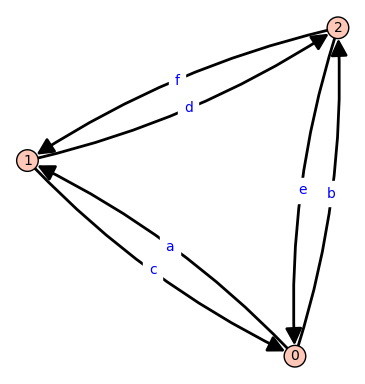

In [2]:
forget()
a,b,c,d,e,f = var('a,b,c,d,e,f')
D = matrix([[0,a,b],[c,0,d],[e,f,0]])
DG = DiGraph(D,weighted = True)
DG.show(edge_labels = True)

Here is the Kleene star of D:
D_Star = $
\begin{pmatrix}
min(0,a+c,b+e) & min(a,a,b+f)   & min(b,a+d,b) \\
min(c,c,d+e)   & min(a+c,0,d+f) & min(c+b,d,d) \\
min(e,f+c,e)   & min(a+e,f,f)   & min(e+b,d+f,0)
\end{pmatrix}$

In [3]:
#(1,1)
H1  = Polyhedron(eqns=[[0,1,0,1,0,0,0]],ieqs=[[0,-1,1,-1,0,1,0]])
H2  = Polyhedron(eqns=[[0,0,1,0,0,1,0]],ieqs=[[0,1,-1,1,0,-1,0]])
#(1,2)
H3  = Polyhedron(ieqs=[[0,-1,1,0,0,0,1]])
#(1,3)
H4  = Polyhedron(ieqs=[[0,1,-1,0,1,0,0]])
#(2,1)
H5  = Polyhedron(ieqs=[[0,0,0,-1,1,1,0]])
#(2,2)
H6  = Polyhedron(eqns=[[0,1,0,1,0,0,0]],ieqs=[[0,0,0,0,1,0,1]])
H7  = Polyhedron(eqns=[[0,0,0,0,1,0,1]],ieqs=[[0,1,0,1,0,0,0]])
#(2,3)
H8  = Polyhedron(ieqs=[[0,0,1,1,-1,0,0]])
#(3,1)
H9  = Polyhedron(ieqs=[[0,0,0,1,0,-1,1]])
#(3,2)
H10 = Polyhedron(ieqs=[[0,1,0,0,0,1,-1]])
#(3,3)
H11 = Polyhedron(eqns=[[0,0,1,0,0,1,0]],ieqs=[[0,0,0,0,1,0,1]])
H12 = Polyhedron(eqns=[[0,0,0,0,1,0,1]],ieqs=[[0,0,1,0,0,1,0]])

Redoing the Hyperplanes as regions

In [4]:
#(1,1)
R1   = Polyhedron(ieqs = [[0,-1,1,-1,0,1,0],[0,-1,0,-1,0,0,0]])
R2   = Polyhedron(ieqs = [[0,1,0,1,0,0,0],[0,0,1,0,0,1,0]])
R3   = Polyhedron(ieqs = [[0,0,-1,0,0,-1,0],[0,1,-1,1,0,-1,0]])
F11  = [R1,R2,R3]
#(1,2)
R4   = Polyhedron(ieqs = [[0,-1,1,0,0,0,1]])
R5   = Polyhedron(ieqs = [[0,1,-1,0,0,0,-1]])
F12  = [R4,R5]
#(1,3)
R6   = Polyhedron(ieqs = [[0,1,-1,0,1,0,0]])
R7   = Polyhedron(ieqs = [[0,-1,1,0,-1,0,0]])
F13  = [R6,R7]
#(2,1)
R8   = Polyhedron(ieqs = [[0,0,0,-1,1,1,0]])
R9   = Polyhedron(ieqs = [[0,0,0,1,-1,-1,0]])
F21  = [R8,R9]
#(2,2)
R10  = Polyhedron(ieqs = [[0,-1,0,-1,1,0,1],[0,-1,0,-1,0,0,0]])
R11  = Polyhedron(ieqs = [[0,0,0,0,1,0,1],[0,1,0,1,0,0,0]])
R12  = Polyhedron(ieqs = [[0,0,0,0,-1,0,-1],[0,1,0,1,-1,0,-1]])
F22  = [R10,R11,R12]
#(2,3)
R13  = Polyhedron(ieqs = [[0,0,1,1,-1,0,0]])
R14  = Polyhedron(ieqs = [[0,0,-1,-1,1,0,0]])
F23  = [R13,R14]
#(3,1)
R15  = Polyhedron(ieqs = [[0,0,0,1,0,-1,1]])
R16  = Polyhedron(ieqs = [[0,0,0,-1,0,1,-1]])
F31  = [R15,R16]
#(3,2)
R17  = Polyhedron(ieqs = [[0,1,0,0,0,1,-1]])
R18  = Polyhedron(ieqs = [[0,-1,0,0,0,-1,1]])
F32  = [R17,R18]
#(3,3)
R19  = Polyhedron(ieqs = [[0,0,-1,0,1,-1,1],[0,0,-1,0,0,-1,0]])
R20  = Polyhedron(ieqs = [[0,0,1,0,0,1,0],[0,0,0,0,1,0,1]])
R21  = Polyhedron(ieqs = [[0,0,1,0,-1,1,-1],[0,0,0,0,-1,0,-1]])
F33  = [R19,R20,R21]

Find the feasible, full dimensional regions:

In [5]:
def regions_of_complex(polyhedral_complex):
    r"""
    Returns the feasible regions of the ``polyhedral_complex``.
    Follows the method of regions in the hyperplane arrangements.
    
    INPUT: 
    
    - ``polyhedral_complex`` -- list. A list of polyhedron objects
    
    OUTPUT:
    
    A tuple of regions.
    """
    R = polyhedral_complex[0][0].base_ring()
    universe = Polyhedron(eqns = [[0] + [0]*6],base_ring = R)
    regions = [universe]
    for fan in polyhedral_complex:
        subdivided = []
        for region in regions:
            for cone in fan:
                part = region.intersection(cone)
                if part.dim()==6:
                    subdivided.append(part)
        regions = subdivided
    return tuple(regions)

Test it on the fans

In [6]:
six_variables_complex = [F11,F12,F13,F21,F22,F23,F31,F32,F33]
regions = regions_of_complex(six_variables_complex)


In [7]:
len(regions)

117

Extend the list of assumptions by adding pairs of assumptions of the form $2a + b - c > 0, c + d > 0$ to $2a + b + d > 0$

In [9]:
import re
def extend_assumptions(integer):
    #integer is the number of rounds in which we combine each pair
    for i in range(integer):
        #extract all inequalities
        #assuming that all inequalities are of the form "2a+b-c>0"
        pos_str = []
        for assumption in assumptions():
            asstr = str(assumption)
            if re.search(" > 0", asstr):
                pos_str.append(re.split(" > ", asstr)[0])

        #try to add combined assumptions
        for term1 in pos_str:
            for term2 in pos_str:
                try:
                    eval('assume('+term1+' + '+term2+' > 0)')
                except:
                    continue   

Discard the infeasible regions

In [10]:
def feasible_regions(initial_regions):
    r"""
    From the regions of a polyhedral complex, return the feasible regions.
    
    INPUT:
    
    -  ``initial_regions`` -- tuple of polyhedron objects. 
    
    OUTPUT:
    
    tuple of polyhedron objects representiing the feasible regions.
    """
    
    symbols_vec = vector([0,a,b,c,d,e,f])
    final_regions = list(initial_regions)
    for region in initial_regions:
        forget()
        assume(a,b,c,d,e,f,'integer')
        for ineq in region.inequalities_list():
            new_ineq = symbols_vec.dot_product(vector(ineq))
            assume(new_ineq > 0)
        extend_assumptions(2)
        if a+c < 0 or b+e < 0 or d+f < 0:
            final_regions.remove(region)
            print str(len(final_regions))+' regions left'
    return final_regions

    '''
    symbols_vec = vector([0,a,b,c,d,e,f])
    final_regions = []
    left = len(regions)
    for region in initial_regions:
        forget()
        assume(a,b,c,d,e,f,'integer')
        for ineq in region.inequalities_list():
            new_ineq = symbols_vec.dot_product(vector(ineq))
            assume(new_ineq > 0)
        extend_assumptions(2)
        if not (a+c < 0 or b+e < 0 or d+f < 0):
            final_regions.append([region, assumptions()])
        else:
            left += -1
            print str(left)+' regions left'
    return final_regions
    '''

In [11]:
feas_regs = feasible_regions(regions)

116 regions left
115 regions left
114 regions left
113 regions left
112 regions left
111 regions left
110 regions left
109 regions left
108 regions left
107 regions left
106 regions left
105 regions left
104 regions left
103 regions left
102 regions left
101 regions left
100 regions left
99 regions left
98 regions left
97 regions left
96 regions left
95 regions left
94 regions left
93 regions left
92 regions left
91 regions left
90 regions left
89 regions left
88 regions left
87 regions left
86 regions left
85 regions left
84 regions left
83 regions left
82 regions left
81 regions left
80 regions left
79 regions left
78 regions left
77 regions left
76 regions left
75 regions left
74 regions left
73 regions left
72 regions left
71 regions left
70 regions left
69 regions left
68 regions left
67 regions left
66 regions left
65 regions left
64 regions left
63 regions left
62 regions left
61 regions left
60 regions left
59 regions left
58 regions left
57 regions left
56 regions left
55 regi

In [12]:
len(feas_regs)

18

In [13]:
first_region= regions[0]
first_region.inequalities_list()

[[0, 1, -1, 0, 1, 0, 0],
 [0, -1, 1, -1, 0, 1, 0],
 [0, 0, -1, 0, 0, -1, 0],
 [0, 0, 0, 1, 0, -1, 1]]

Try to get the Ehrhart polynomial for ``first_region``
These inequalities imply the following kleene star:
D_star_one = 
$\begin{pmatrix}
a+c & a & b \\
c & a+c & c+b \\
e  & a + e & b+e
\end{pmatrix}$

In [15]:
def tropical_vertices_from_region(region):
    r"""
    Return the symbolic tropical vertices corresponding to 
    a certain region. 
    
    INPUT:
    
    - ``region`` -- a polyhedron object. 
    
    OUTPUT:
    
    A list of the tropical vertices (already in the plane). 
    """
    forget()
    symbols_vec = vector([0,a,b,c,d,e,f])
    assume(a,b,c,d,e,f,'integer')
    for ineq in region.inequalities_list():
        new_ineq = symbols_vec.dot_product(vector(ineq))
        assume(new_ineq > 0)
    extend_assumptions(2)
    Kleene = matrix([[min(min(0, a+c),min(a+c,b+e)), min(a,a,b+f)  , min(b,a+d,b)],
                     [min(c,c,d+e)  , min(a+c,0,d+f), min(c+b,d,d)],
                     [min(e,f+c,e)  , min(a+e,f,f)  , min(e+b,d+f,0)]])
    #subtract the first entry
    L = list()
    for i in range(len(Kleene.rows())):
        new_row = list()
        j = Kleene.row(i)[0]
        for k in range(1,len(Kleene.row(i))):
            new_row.append(Kleene.row(i)[k] - j)
        L.append(new_row)
    return L
    
    


In [16]:
verts = tropical_vertices_from_region(feas_regs[0])
verts

[[a, b], [-c, -c + d], [-e + f, -e]]

In [18]:
polytron = compute_pseudovertices(verts)

In [19]:
polytron

{'edges': [[0, 1], [0, 2], [1, 3], [2, 3]],
 'pseudo': [[a, b], [-c, -c + d], [-e + f, -e], [-c, -e]],
 'vertices': [[a, b], [-c, -c + d], [-e + f, -e]]}

In [20]:
generating_f = gen_fct(polytron).factor()

In [21]:
print generating_f

(t1^(a*n + c*n + e*n + 3)*t2^(b*n + c*n + e*n + 3) - t1^(a*n + c*n + e*n + 2)*t2^(b*n + c*n + e*n + 3) - t1^(a*n + c*n + e*n + 3)*t2^(b*n + c*n + e*n + 2) + t1^(a*n + c*n + e*n + 2)*t2^(b*n + c*n + e*n + 2) - t1^(c*n + f*n + 2)*t2^(c*n + 2) + t1^(e*n + 2)*t2^(c*n + 2) + t1^(c*n + f*n + 2)*t2^(c*n + 1) + t1^(c*n + f*n + 1)*t2^(c*n + 1) - 2*t1^(e*n + 1)*t2^(c*n + 1) - t1^(c*n + f*n + 1)*t2^(c*n) + t1^(e*n)*t2^(c*n) - t1^(e*n + 2)*t2^(d*n + e*n + 2) + t1^(e*n + 1)*t2^(d*n + e*n + 2) + t1^(e*n + 1)*t2^(d*n + e*n + 1) - t1^(e*n)*t2^(d*n + e*n + 1))*t1^(-c*n - e*n)*t2^(-c*n - e*n)/((t1*t2 - 1)^2*(t1 - 1)*(t2 - 1))


Try to compute the generating function for all feasible regions. So far, this works for all but region 12 and 15:

In [26]:
count = 0
generating_fcts = []
for region in feas_regs:
    verts = tropical_vertices_from_region(region)
    polytron = compute_pseudovertices(verts)
    try:
        generating_f = gen_fct(polytron).factor()
        generating_fcts.append(generating_f)
    except:
        print 'impossible to compute generating function for region '+str(count)
        continue
    count += 1

cannot find primitive vector in direction (-a - d - e , -a - d - e)
impossible to compute generating function for region 12
cannot find primitive vector in direction (-b - c - f , 0)
impossible to compute generating function for region 15


Replace all variables by $(1-t)$ and apply l'hopital in order to evaluate the generating function at $(1,\dots,1)$:

In [31]:
def lhopital(generating_f):
    #substitute all variables by (1-t)
    t = var('t')
    for j in range(1,3):
         generating_f = generating_f.subs({var('t'+str(j)):1-t})
        #generating_f = generating_f.subs({var('t'+str(j)):1-j*t})
    
    #l'hopital
    p = generating_f.numerator()
    q = generating_f.denominator()
    alpha = 0
    p_deriv= p
    q_deriv = q
    while true:
        p_deriv = p_deriv.derivative(t)
        q_deriv = q_deriv.derivative(t)
        alpha += 1
        if not (p_deriv(t=0)==0 or q_deriv(t=0)==0):
            break
    return p_deriv(t=0)/q_deriv(t=0)

Evaluate the generating functions of all regions but 12 and 15 at $(1,\dots,1)$:

In [35]:
multivariate_ehrhart = []
for generating_f in generating_fcts:
    multivariate_ehrhart.append(lhopital(generating_f).simplify_full())

In [36]:
multivariate_ehrhart

[1/8*(a^2 + 2*a*b + b^2 - 4*c^2 + 8*c*d - 2*d^2 + 8*c*e - 4*e^2 + 8*e*f - 2*f^2)*n^2 + 1/8*(7*a + 7*b + 4*c - 4*d + 4*e - 4*f)*n + 5/4,
 -1/4*(a^2 - 2*a*b - b^2 + 2*(a - b)*c + 2*c^2 - 2*c*d + d^2 - 4*(a + c)*e)*n^2 + 1/4*(a + 5*b + 2*c - d + 4*e)*n + 1,
 1/8*(a^2 + 2*a*b + b^2 + 2*(a + b)*c + c^2 + 4*c*d - 2*d^2 + 4*c*f + 2*f^2)*n^2 + 1/8*(7*a + 7*b + 11*c - 4*d)*n + 5/4,
 1/4*(a^2 + 2*a*b - b^2 + 4*b*c + 2*(a - b + 2*c)*e - 2*e^2 + 2*e*f - f^2)*n^2 + 1/4*(5*a + b + 4*c + 2*e - f)*n + 1,
 (a*b + b*c + (a + c)*e)*n^2 + (a + b + c + e)*n + 1,
 1/4*(a^2 + 2*a*b - b^2 + 2*(a + b)*c + 2*c^2 + 2*c*f + f^2)*n^2 + 1/4*(5*a + b + 6*c + f)*n + 1,
 1/8*(a^2 + 2*a*b + b^2 + 2*d^2 + 2*(a + b + 2*d)*e + e^2 + 4*e*f - 2*f^2)*n^2 + 1/8*(7*a + 7*b + 11*e - 4*f)*n + 5/4,
 -1/4*(a^2 - 2*a*b - b^2 - d^2 - 2*(a + b + d)*e - 2*e^2)*n^2 + 1/4*(a + 5*b + d + 6*e)*n + 1,
 1/8*(4*a^2 - 4*c^2 + 4*(a + 2*c)*d - d^2 + 8*c*e - 4*e^2 + 8*e*f - 2*f^2)*n^2 + 1/8*(14*a + 4*c + 3*d + 4*e - 4*f)*n + 5/4,
 1/2*(a^2 - c^2